# Mouse Nissl example

This example maps betwen two Nissl stained mouse brain images.

Here we will use affine alignment in adition to deformable registration.  

Affine will be performed first, then both will be performed simultaneously

## Library imports
We start by importing necessary libraries.  That includes numpy, matplotlib, and tensorflow for numerical work, nibabel for loading neuroimages, and lddmm and vis which are part of this library.

In [1]:
import numpy as np # for arrays
%matplotlib notebook
import matplotlib as mpl # for graphics
import matplotlib.pyplot as plt
import nibabel as nib # for loading neuroimages
import lddmm # algorithm
import vis # visualization
import tensorflow as tf
import imp # use imp.reload to update modules during development

importing vis


In [2]:
# get filenames
atlas_image_fname = 'PMD2052_orig_target_STS_clean.img'
target_image_fname = 'PMD3097_orig_target_STS_clean.img'

In [3]:
# load them with nibabel
fnames = [atlas_image_fname,target_image_fname]
img = [nib.load(fname) for fname in fnames]

In [4]:
# get info about image space
if '.img' == atlas_image_fname[-4:]:    
    nxI = img[0].header['dim'][1:4]
    dxI = img[0].header['pixdim'][1:4]
    nxJ = img[1].header['dim'][1:4]
    dxJ = img[1].header['pixdim'][1:4]
else:
    # I'm only working with analyze for now
    raise ValueError('Only Analyze images supported for now')
xI = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nxI,dxI)]
xJ = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nxJ,dxJ)]

In [5]:
# get the images, note they also include a fourth axis for time that I don't want
I = img[0].get_data()[:,:,:,0]
J = img[1].get_data()[:,:,:,0]

<IPython.core.display.Javascript object>


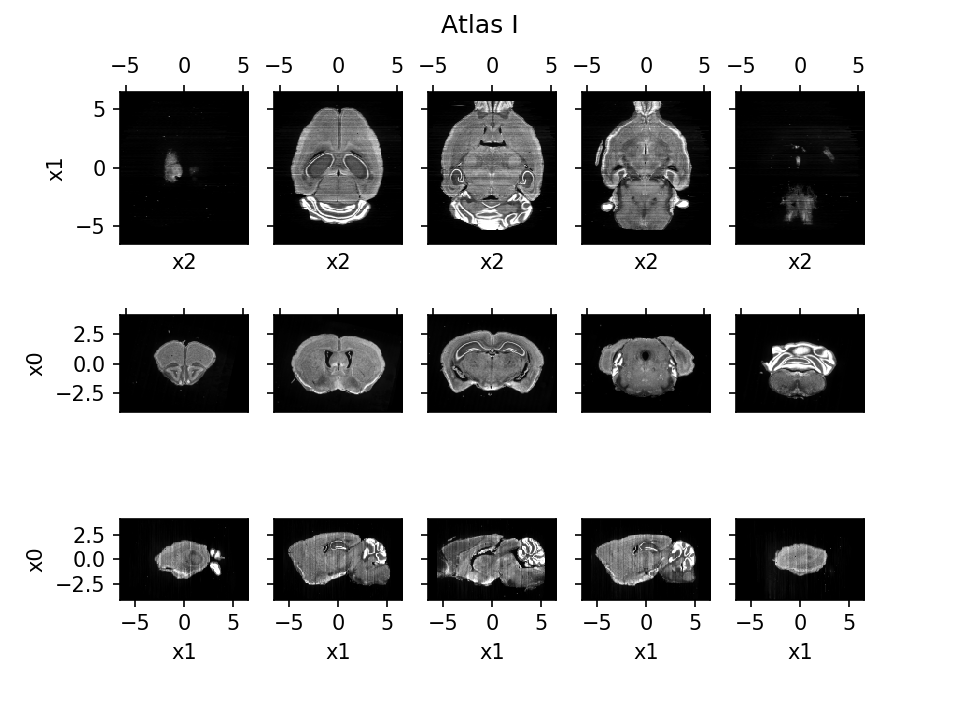

In [6]:
# display the data
f = plt.figure()
vis.imshow_slices(I, x=xI, fig=f)
f.suptitle('Atlas I')
f.canvas.draw()

<IPython.core.display.Javascript object>


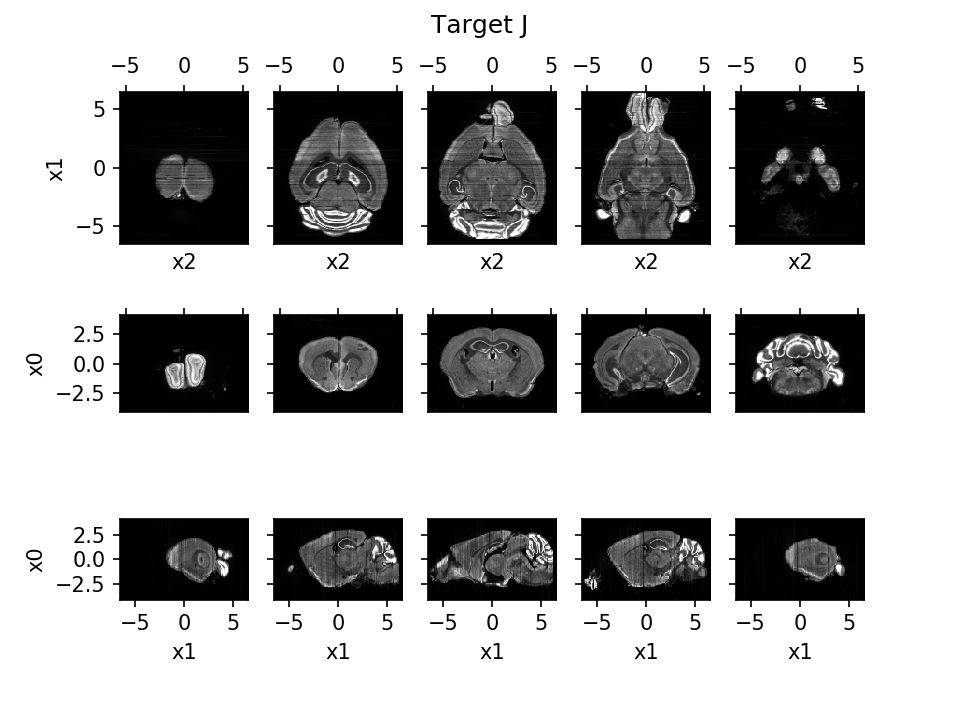

In [7]:
f = plt.figure()
vis.imshow_slices(J,x=xJ,fig=f)
f.suptitle('Target J')
f.canvas.draw()

## Run DR IT image matching

Set default parameters
Initial affine transform [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Got parameters


<IPython.core.display.Javascript object>


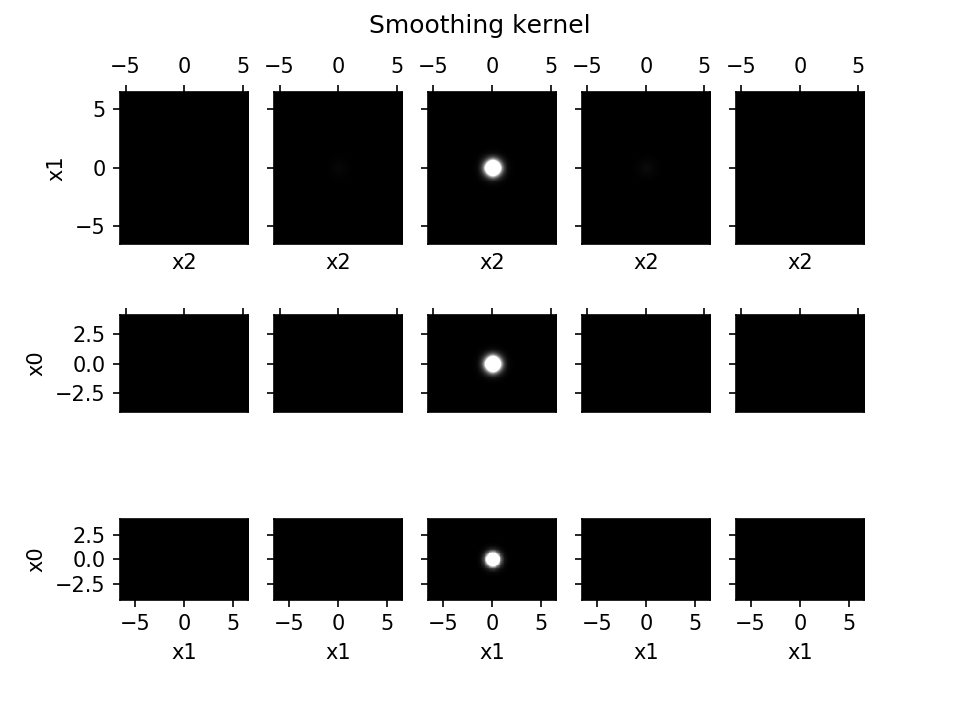

Built energy operators
Built tensorflow variables
Computation graph defined


<IPython.core.display.Javascript object>


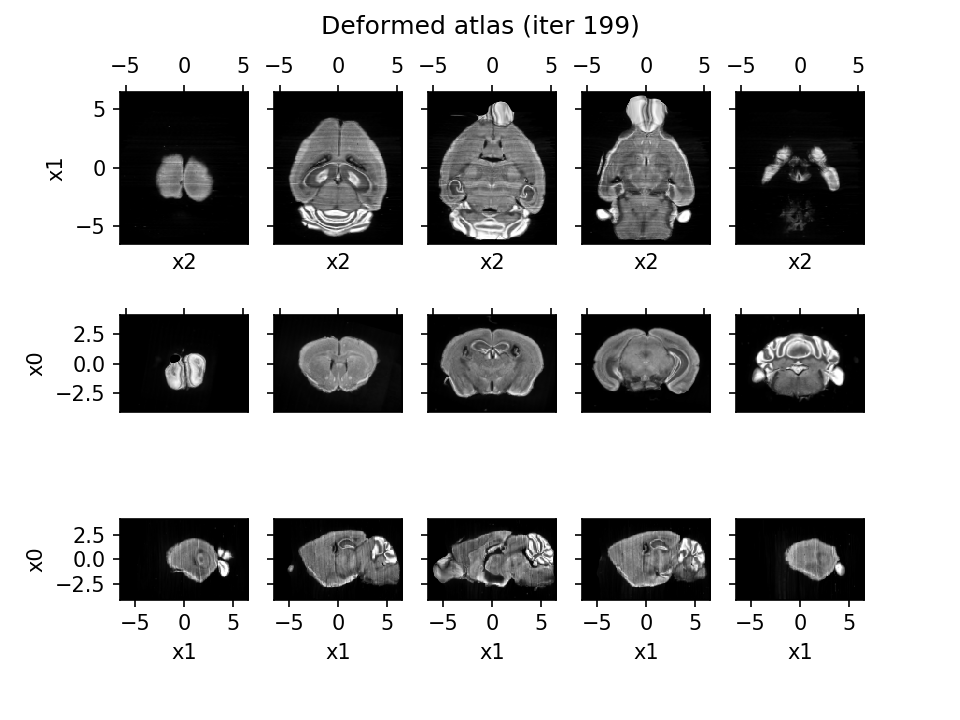

<IPython.core.display.Javascript object>


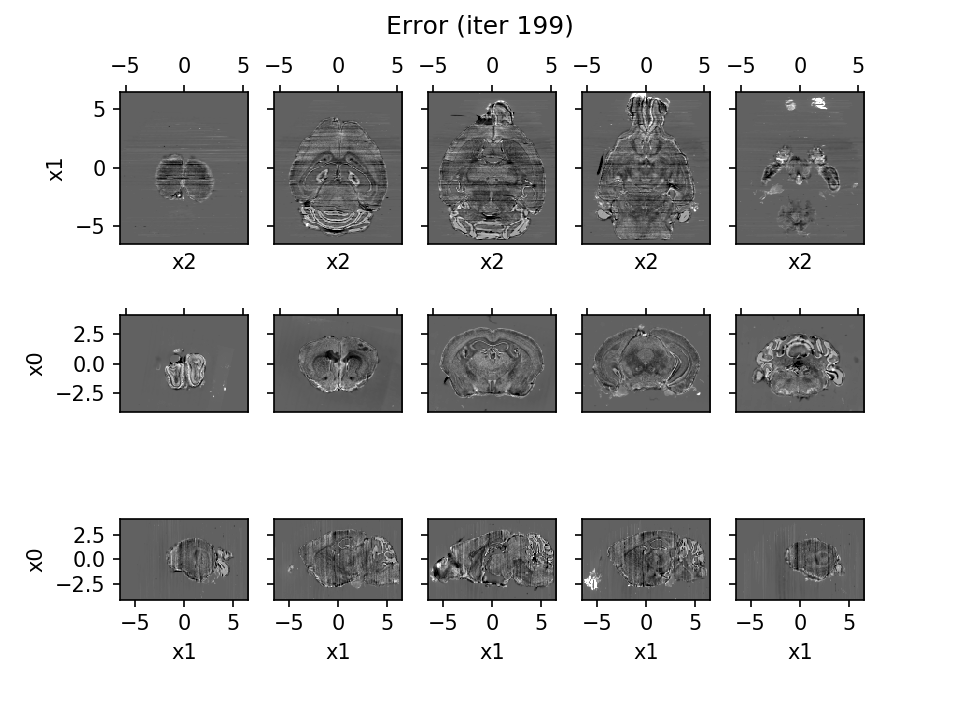

<IPython.core.display.Javascript object>


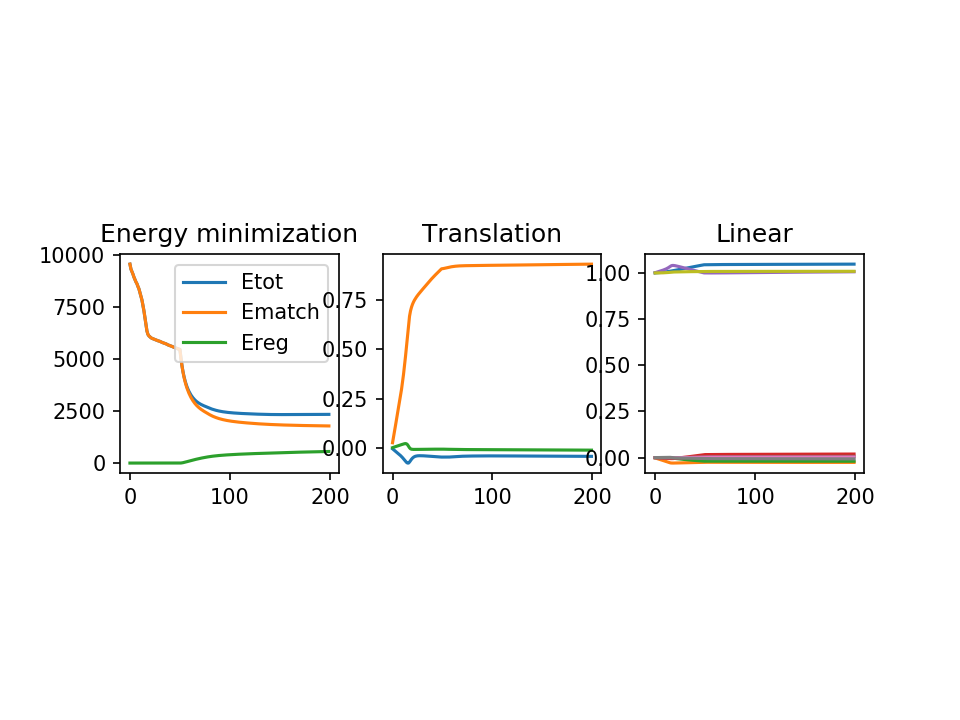

Taking affine only step
Finished iteration 0, energy 9.542474e+03 (match 9.542474e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 1, energy 9.302493e+03 (match 9.302493e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 2, energy 9.186726e+03 (match 9.186726e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 3, energy 9.064184e+03 (match 9.064184e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 4, energy 8.920071e+03 (match 8.920071e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 5, energy 8.806855e+03 (match 8.806855e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 6, energy 8.689073e+03 (match 8.689073e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 7, energy 8.602198e+03 (match 8.602198e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 8, energy 8.470029e+03 (match 8.470029e+03, reg 0.000000e+00)
Taking affine only step
Finished iteration 9, energy 8.

Finished iteration 75, energy 2.726653e+03 (match 2.455361e+03, reg 2.712917e+02)
Taking affine and deformation step
Finished iteration 76, energy 2.704915e+03 (match 2.424886e+03, reg 2.800299e+02)
Taking affine and deformation step
Finished iteration 77, energy 2.684269e+03 (match 2.395836e+03, reg 2.884330e+02)
Taking affine and deformation step
Finished iteration 78, energy 2.664288e+03 (match 2.367803e+03, reg 2.964846e+02)
Taking affine and deformation step
Finished iteration 79, energy 2.644245e+03 (match 2.340068e+03, reg 3.041770e+02)
Taking affine and deformation step
Finished iteration 80, energy 2.625532e+03 (match 2.314041e+03, reg 3.114910e+02)
Taking affine and deformation step
Finished iteration 81, energy 2.606848e+03 (match 2.288433e+03, reg 3.184144e+02)
Taking affine and deformation step
Finished iteration 82, energy 2.589593e+03 (match 2.264647e+03, reg 3.249459e+02)
Taking affine and deformation step
Finished iteration 83, energy 2.573715e+03 (match 2.242612e+03, 

Finished iteration 145, energy 2.326748e+03 (match 1.841248e+03, reg 4.854999e+02)
Taking affine and deformation step
Finished iteration 146, energy 2.326370e+03 (match 1.839245e+03, reg 4.871247e+02)
Taking affine and deformation step
Finished iteration 147, energy 2.326079e+03 (match 1.837303e+03, reg 4.887758e+02)
Taking affine and deformation step
Finished iteration 148, energy 2.325881e+03 (match 1.835429e+03, reg 4.904518e+02)
Taking affine and deformation step
Finished iteration 149, energy 2.325765e+03 (match 1.833617e+03, reg 4.921477e+02)
Taking affine and deformation step
Finished iteration 150, energy 2.325726e+03 (match 1.831872e+03, reg 4.938545e+02)
Taking affine and deformation step
Finished iteration 151, energy 2.325748e+03 (match 1.830186e+03, reg 4.955625e+02)
Taking affine and deformation step
Finished iteration 152, energy 2.325808e+03 (match 1.828548e+03, reg 4.972598e+02)
Taking affine and deformation step
Finished iteration 153, energy 2.325893e+03 (match 1.826

In [8]:
imp.reload(lddmm) # for debugging only

p = 2
sigmaM = 10.0

eL = 5e-7
eT = 2e-5
eV = 5e-4

naffine = 50
niter = 200
sigmaR = 2e-1
a = (xI[0][1]-xI[0][0])*2 # 2 pixels smoothness scale



out = lddmm.lddmm(I,J, # atlas and target images
                  xI=xI,
                  xJ=xJ,
                  niter=niter, # number of iterations of gradient descent  
                  naffine=naffine, # number of iteratoins of affine only optimization
                  eV=eV, # step size for deformation field update
                  eL=eL,
                  eT=eT,
                  sigmaM=sigmaM, # noise in image (matching weight 1/2/sigmaM**2)
                  sigmaR=sigmaR, # noise in deformation (regularization weight 1/2/sigmaR**2)
                  p=p, # power of smoothing operator, 2 is typical
                  a=a # length scale of smoothing operator (mm)
                 )
# if I don't input a voxel spacing, it will default to 1